In [64]:
import polars as pl
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from datetime import datetime, timedelta

In [65]:
df = pl.read_parquet(r'C:\Users\310\Desktop\Progects_Py\data\microstructure_price_prediction_data\cross_section\df_cross_section_V0.1_.parquet')
df

trade_time,price,quantity,is_buyer_maker,date,symbol,quote,last_ask,last_bid,target,spread,cum_quote,minute_sin,minute_cos,hour_sin,hour_cos,day_sin,day_cos,week_sin,week_cos,month_sin,month_cos,year_sin,year_cos,target_lag_1,price_lag_1,target_lag_2,price_lag_2,target_lag_3,price_lag_3,target_lag_5,price_lag_5,target_lag_7,price_lag_7,target_five_step_ahead
datetime[ms],f64,f64,bool,date,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-06-15 00:00:00.773,0.13499,149.0,false,2024-06-15,"""DOGE-USDT""",20.11351,null,0.13499,null,null,20.11351,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,null,null,null,null,null,null,null,null,null,null,0.134985
2024-06-15 00:00:03.117,0.13498,2745.0,true,2024-06-15,"""DOGE-USDT""",370.5201,0.13498,0.13499,0.134985,0.00001,789.90296,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,null,0.13499,null,null,null,null,null,null,null,null,0.13498
2024-06-15 00:00:04.223,0.13498,2223.0,true,2024-06-15,"""DOGE-USDT""",300.06054,0.13498,0.13499,0.134985,0.00001,300.06054,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,0.134985,0.13498,null,0.13499,null,null,null,null,null,null,0.134985
2024-06-15 00:00:04.291,0.13498,1449.0,true,2024-06-15,"""DOGE-USDT""",195.58602,0.13498,0.13499,0.134985,0.00001,199.90538,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,0.134985,0.13498,0.134985,0.13498,null,0.13499,null,null,null,null,0.13499
2024-06-15 00:00:04.299,0.13498,17079.0,true,2024-06-15,"""DOGE-USDT""",2305.32342,0.13498,0.13499,0.134985,0.00001,2305.32342,0.0,1.0,0.0,1.0,0.781831,0.62349,0.239316,-0.970942,1.2246e-16,-1.0,-0.280231,-0.959933,0.134985,0.13498,0.134985,0.13498,0.134985,0.13498,null,null,null,null,0.134995
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-07-15 23:59:44.687,27.81,0.19,false,2024-07-15,"""AVAX-USDT""",5.2839,27.8,27.81,27.805,0.01,11410.1649,-0.104528,0.994522,-0.258819,0.965926,0.781831,0.62349,-0.354605,-0.935016,-0.5,-0.866025,-0.280231,-0.959933,27.805,27.81,27.805,27.81,27.8,27.8,27.81,27.8,27.82,27.82,null
2024-07-15 23:59:44.854,27.82,0.19,false,2024-07-15,"""AVAX-USDT""",5.2858,27.8,27.82,27.81,0.02,422.5858,-0.104528,0.994522,-0.258819,0.965926,0.781831,0.62349,-0.354605,-0.935016,-0.5,-0.866025,-0.280231,-0.959933,27.805,27.81,27.805,27.81,27.805,27.81,27.81,27.8,27.815,27.81,null
2024-07-15 23:59:44.904,27.82,23.54,true,2024-07-15,"""AVAX-USDT""",654.8828,27.82,27.82,27.82,0.0,2782.0,-0.104528,0.994522,-0.258819,0.965926,0.781831,0.62349,-0.354605,-0.935016,-0.5,-0.866025,-0.280231,-0.959933,27.81,27.82,27.805,27.81,27.805,27.81,27.8,27.8,27.81,27.8,null


Visually inspect the data

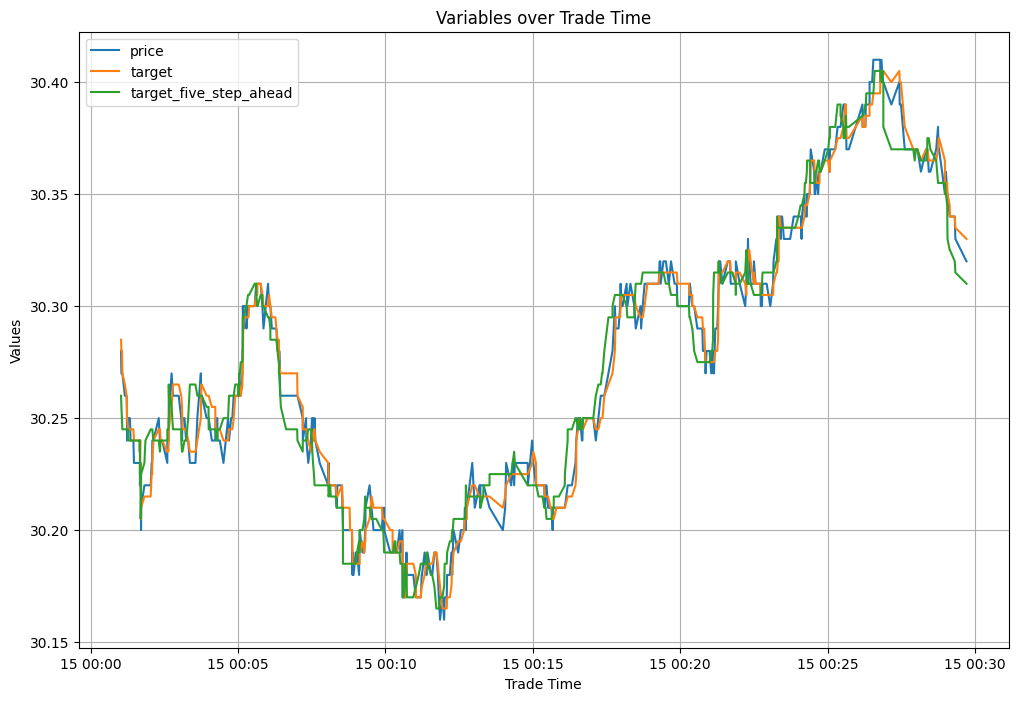

In [66]:
symbols: list[str] = df.select(pl.col('symbol')).unique()

start_time: datetime = datetime(2024, 6, 15, 0, 1)
end_time: datetime = datetime(2024, 6, 15, 0, 30)

# Variables to plot (specify)
variables_to_plot: list[str] = ['price', 'target', "target_five_step_ahead"]

df_for_plot: pl.DataFrame = df.filter((pl.col('symbol') == symbols[0]) &
                                      (pl.col('trade_time').is_between(lower_bound=start_time, upper_bound=end_time)))

# Plot all variables on the same plot
plt.figure(figsize=(12, 8))

for var in variables_to_plot:
    plt.plot(df_for_plot['trade_time'], df_for_plot[var], label=var)

plt.xlabel('Trade Time')
plt.ylabel('Values')
plt.title('Variables over Trade Time')
plt.legend()
plt.grid()
plt.show()

Note that here we are going to use our precomputed features and some raw inputs. We are going to drop "target" (use target_one_step_ahead instead).

In [67]:
df = df.select(pl.exclude("target"))


In [68]:
train_test_ratio = 0.5


df_train = pl.DataFrame()
df_test = pl.DataFrame()

for currency_pair in df["symbol"].unique():

    curr_df = df.filter(pl.col('symbol') == currency_pair)
    split_indx = int(len(curr_df) * train_test_ratio)
    
    train = curr_df[:split_indx]
    test = curr_df[split_indx:]

    print(f'Train len for {currency_pair} is {len(train)}')
    print(f'Test len for {currency_pair} is {len(test)}')

    df_train = df_train.vstack(train) if not df_train.is_empty() else train
    df_test = df_test.vstack(test) if not df_test.is_empty() else test



Train len for DOGE-USDT is 1624660
Test len for DOGE-USDT is 1624660
Train len for AVAX-USDT is 676828
Test len for AVAX-USDT is 676829


### Mixed effects (Fixed effects with both time entity effects and time effects).

In [69]:
# Data preparation 
df_train_pd: pd.DataFrame = df_train.to_pandas()
df_test_pd: pd.DataFrame = df_test.to_pandas()

df_train_pd = df_train_pd.set_index(['symbol', 'trade_time'])
df_test_pd = df_test_pd.set_index(['symbol', 'trade_time'])

df_train_pd = df_train_pd.drop(columns=["is_buyer_maker", "date"]).dropna()
df_test_pd = df_test_pd.drop(columns=["is_buyer_maker", "date"]).dropna()

In [ ]:
# Feature selection 
target_column: str = "target_five_step_ahead"
assert target_column in df_train_pd.columns, f"{target_column} not found in train data columns"

scaler = StandardScaler()
X_train: pd.DataFrame = scaler.fit_transform(df_train_pd.drop(target_column, axis=1))

# Feature selection using LASSO
lasso = LassoCV(cv=2).fit(X_train, df_train_pd[target_column])
selector = SelectFromModel(lasso, prefit=True)

# Select important features
selected_features = list(df_train_pd.drop(target_column, axis=1).columns[selector.get_support()])

print(f"Features selected by Lasso: {selected_features}")

train_df = df_train_pd[selected_features + [target_column]]
test_df = df_test_pd[selected_features + [target_column]]

In [ ]:
# FE fit 
# Prepare training data
y_train = train_df[target_column]
X_train = train_df[selected_features].assign(const=1)

# Fit fixed-effects model
fe_model = PanelOLS(y_train, X_train, entity_effects=True, time_effects=True)
fe_results = fe_model.fit()
print(fe_results.summary)

# Prepare test data
X_test = test_df[selected_features].assign(const=1)
y_test = test_df[target_column]

# Predict on test data
predictions = fe_results.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Evaluation Metrics:\nMSE: {mse}\nMAPE: {mape}")

                            PanelOLS Estimation Summary                             
Dep. Variable:     target_five_step_ahead   R-squared:                        0.9999
Estimator:                       PanelOLS   R-squared (Between):              1.0000
No. Observations:                 2301472   R-squared (Within):               1.0000
Date:                    Sat, Nov 23 2024   R-squared (Overall):              1.0000
Time:                            17:23:40   Log-likelihood                 1.372e+07
Cov. Estimator:                Unadjusted                                           
                                            F-statistic:                   2.345e+08
Entities:                               2   P-value                           0.0000
Avg Obs:                        1.151e+06   Distribution:                 F(1,12539)
Min Obs:                        6.768e+05                                           
Max Obs:                        1.625e+06   F-statistic (robust):